In [2]:
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
select_columns = ["unix_ts", "V", "I", "P", "Q", "S"]

def plot_data(input_df, which_plot: dict):
    plt.figure(figsize=(10, 6))
    if(which_plot["V"] == True):
        plt.plot(input_df['unix_ts'], input_df['V'], label='Voltage (V)')
    if(which_plot["I"] == True):
        plt.plot(input_df['unix_ts'], input_df['I'], label='Current (I)')
    if(which_plot["P"] == True):
        plt.plot(input_df['unix_ts'], input_df['P'], label='Power (P)')
    if(which_plot["Q"] == True):
        plt.plot(input_df['unix_ts'], input_df['Q'], label='Reactive Power (Q)')
    if(which_plot["S"] == True):
        plt.plot(input_df['unix_ts'], input_df['S'], label='Apparent Power (S)')

    plt.xlabel('Unix Timestamp')
    plt.ylabel('Values')
    plt.title(f'{which_plot["name"]}')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_device_data(device_name, start, end, all_data_df: pl.DataFrame, meter_id: int):
    df = all_data_df.filter((pl.col("sub") == meter_id)).select(select_columns)
    input_df = None
    if (start is None) or (end is None):
        input_df = df
    else:
        input_df = df[start:end]
    plot_data(input_df=input_df, which_plot={
        "name": device_name,
        "V": True,
        "I": True,
        "P": True,
        "Q": False,
        "S": False
    })

# House 1

In [4]:
house1_all_data = pl.concat([pl.read_csv("../../data/RAE_dataset/raw_data/house1_subs_blk2.csv"), 
                             pl.read_csv("../../data/RAE_dataset/raw_data/house1_subs_blk1.csv")])
len(house1_all_data)

145637040

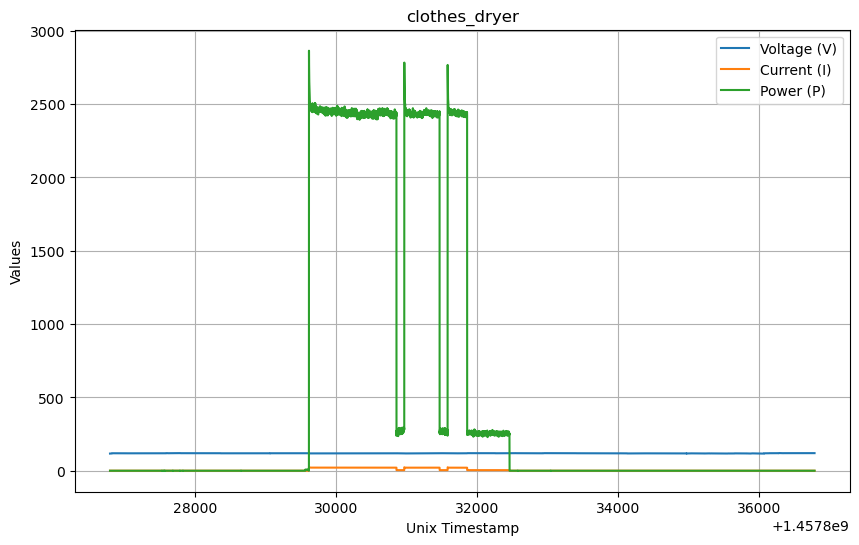

In [15]:
plot_device_data(device_name="clothes_dryer", start=520000, end=530000, all_data_df=house1_all_data, meter_id=5)

/opt/miniconda3/envs/mylab-nilm-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


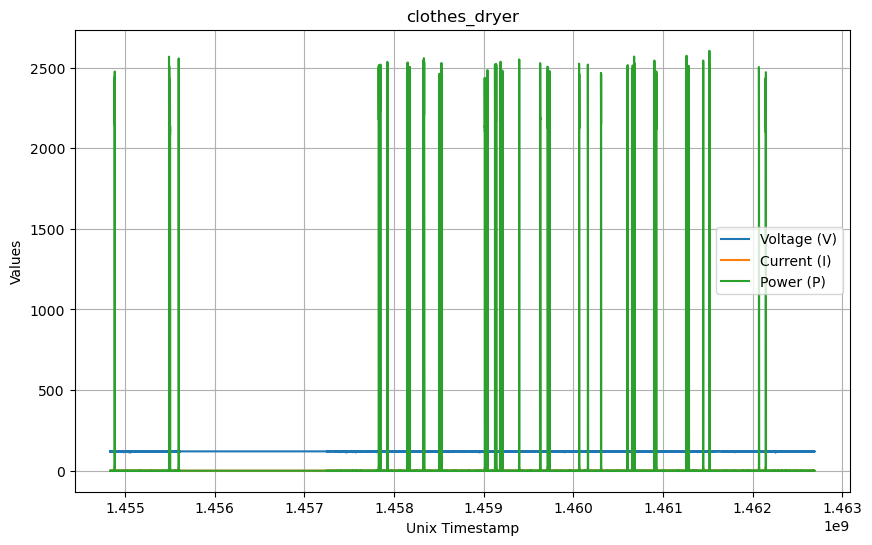

In [7]:
plot_device_data(device_name="clothes_dryer", start=None, end=None, all_data_df=house1_all_data, meter_id=6)

In [ ]:
plot_device_data(device_name="clothes_dryer", start=None, end=None, all_data_df=house1_all_data, meter_id=6)

# House 2

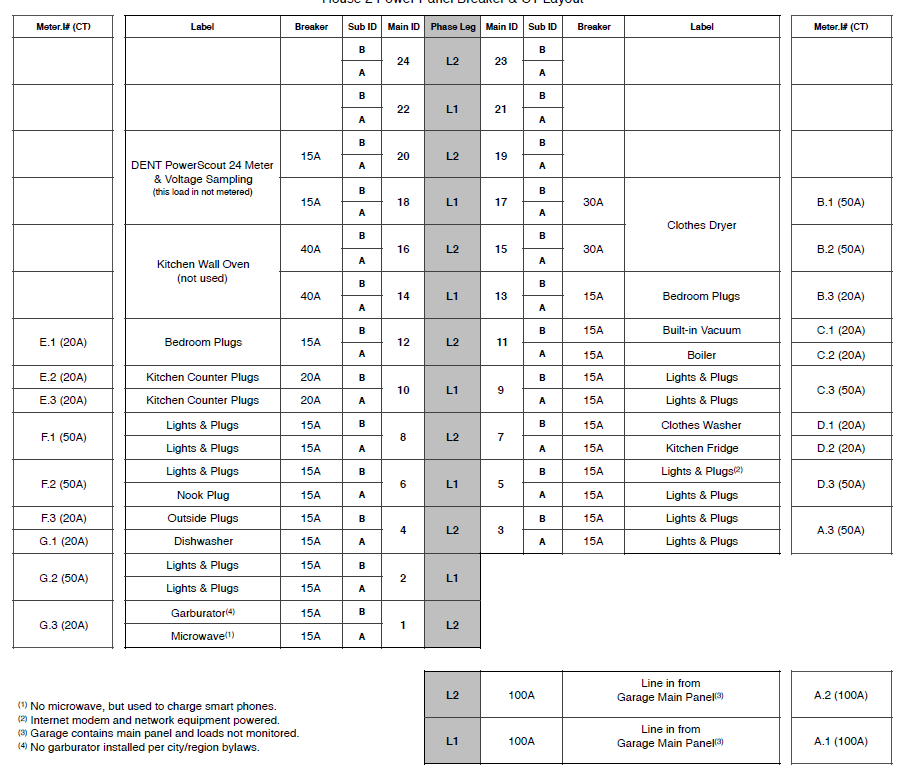

In [4]:
house2_data = pl.read_csv("../../data/RAE_dataset/raw_data/house2_subs_blk1.csv")
select_columns = ["unix_ts", "sub", "V", "I", "P", "Q", "S"]
house2_data = house2_data.select(select_columns)
house2_data.head()

unix_ts,sub,V,I,P,Q,S
i64,i64,f64,f64,i64,i64,i64
1505286000,1,120.9,0.9,71,57,111
1505286000,2,121.1,0.3,32,14,40
1505286000,3,121.1,0.0,0,0,0
1505286000,4,120.9,0.0,0,0,0
1505286000,5,121.1,0.0,1,0,3


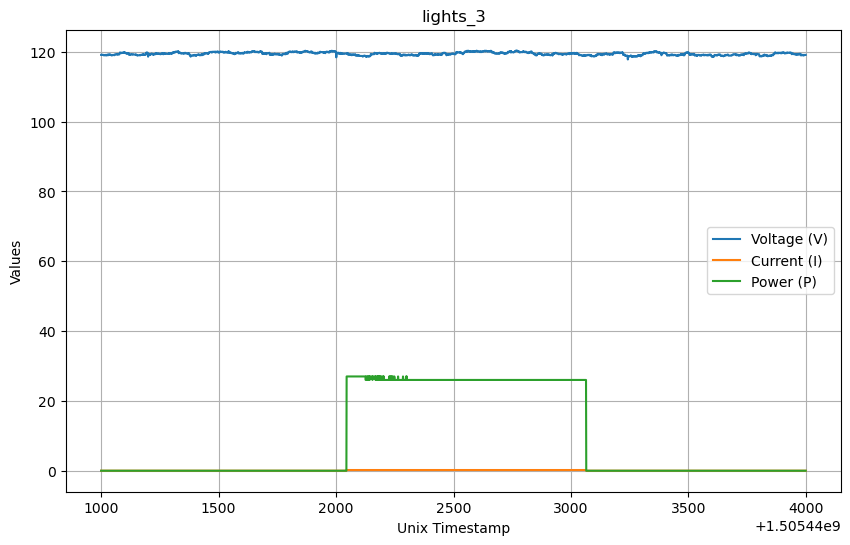

In [8]:
plot_device_data("lights_3", start=155000, end=158000, all_data_df=house2_data, meter_id=3)

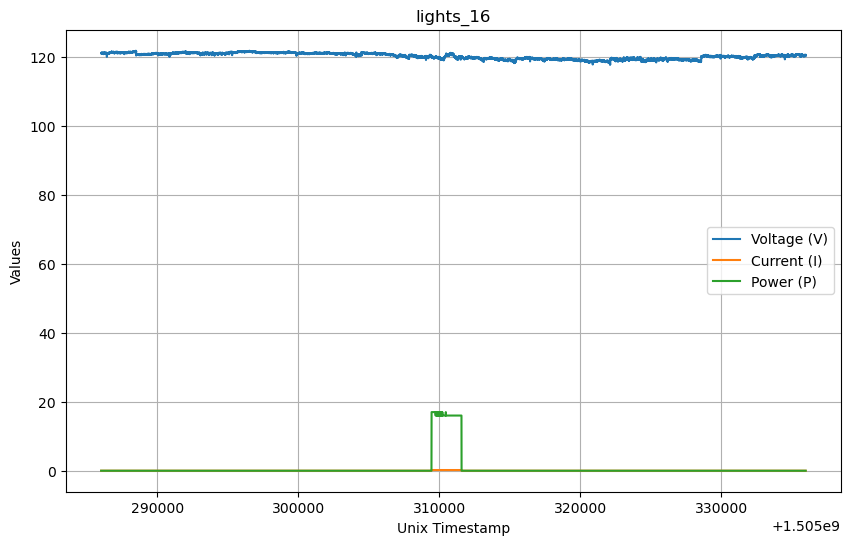

In [9]:
plot_device_data("lights_16", start=0, end=50000, all_data_df=house2_data, meter_id=16)

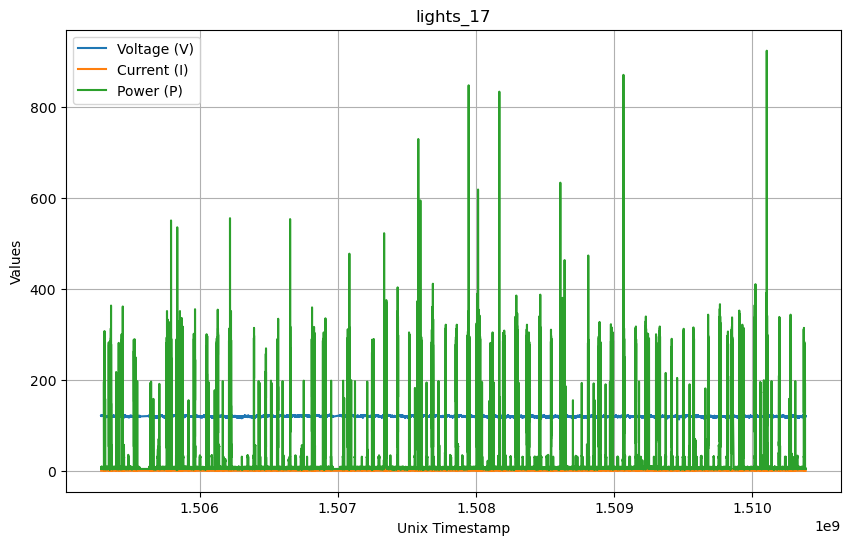

In [49]:
plot_device_data("lights_17", start=None, end=None, all_data_df=house2_data, meter_id=17)

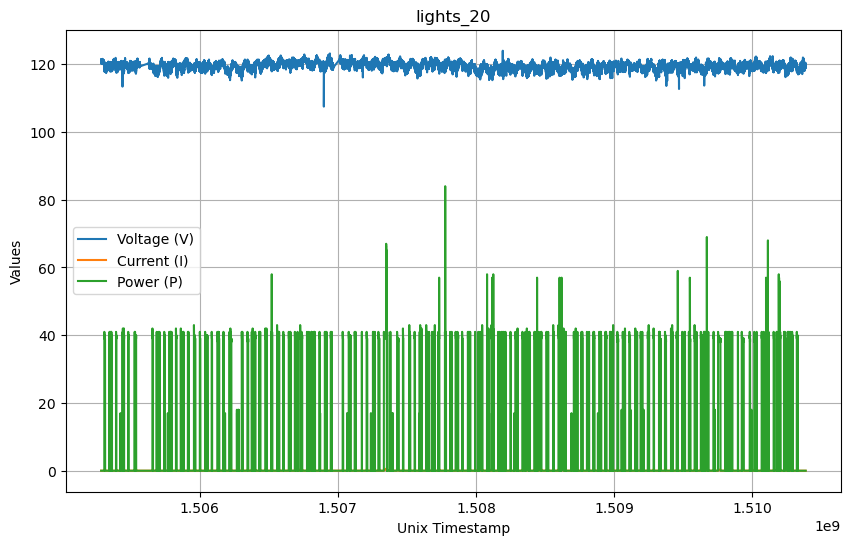

In [11]:
plot_device_data("lights_20", start=None, end=None, all_data_df=house2_data, meter_id=20)

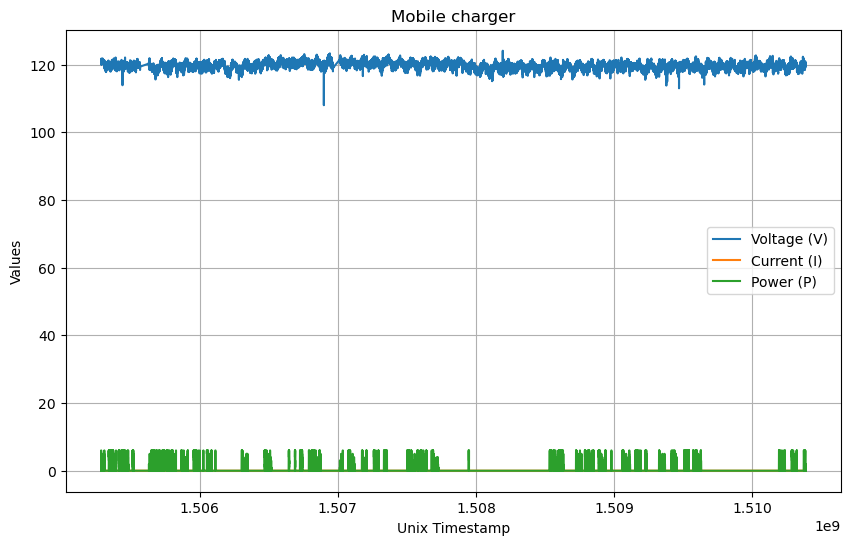

In [26]:
plot_device_data("Mobile charger", house2_data, 21)

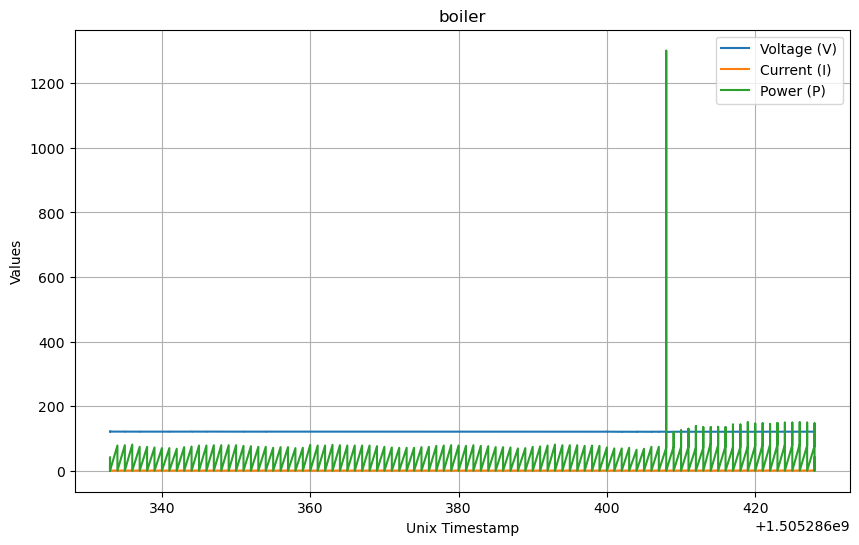

In [34]:
plot_device_data(device_name="boiler", start=7000, end=9000, all_data_df=house2_data, meter_id=8)

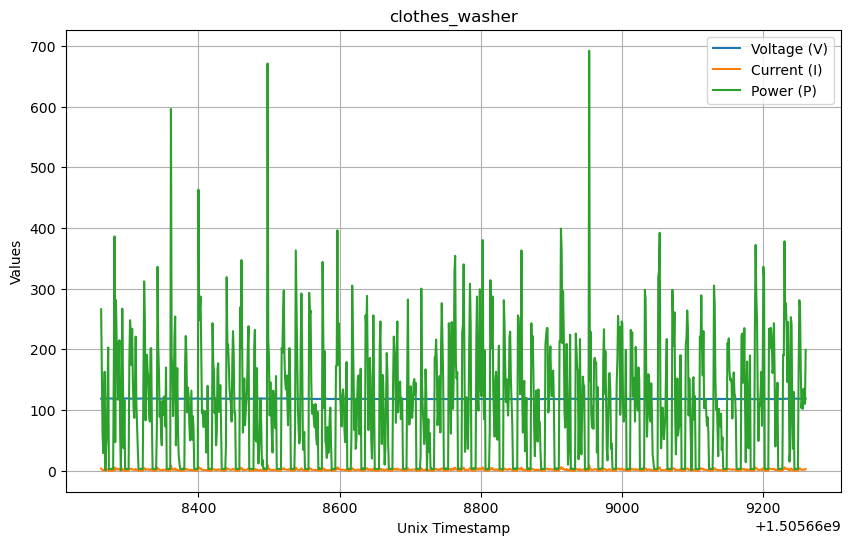

In [83]:
plot_device_data("clothes_washer", start=319000, end=320000, all_data_df=house2_data, meter_id=10)